In [1]:
# In this assignment students have to compress racoon grey scale image into 5 clusters. In
# the end, visualize both raw and compressed image and look for quality difference.

In [2]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import time

In [3]:
face = misc.face(gray=True)

In [4]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

In [5]:
# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering 
N_REGIONS = 25

In [ ]:
for assign_labels in ('kmeans','discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.Spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

In [6]:
# Resize it to 10% of the original size to speed up the processing
face_compressed = misc.imresize(face, 0.10) / 255.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [7]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face_compressed)

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Spectral clustering: kmeans, 14.00s
Spectral clustering: discretize, 10.63s


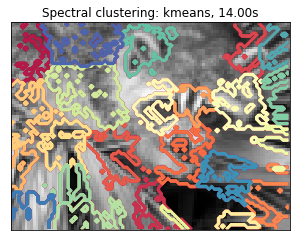

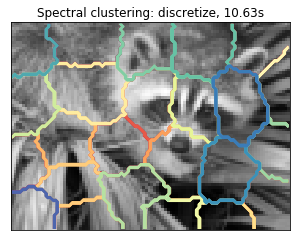

In [8]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face_compressed.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face_compressed, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.Spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()